# Linear Congruential Pseudo-random Number generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### A simple LCG
$$ r_{n+1} = (a r_n + c) \  \mathrm{mod} \ m $$

In [2]:
def generate_lcg( num_iterations,seed=123456789 ):
    
    rndVec = []
    
    # Initialize variables
    x_value = seed    # Our seed, or X_0 = 123456789
    a = 101427               # Our "a" base value
    c = 321                  # Our "c" base value
    m = (2 ** 16)            # Our "m" base value

    # Generate pseudo random numbers
    for i in range(num_iterations):
        x_value = (a * x_value + c) % m
        rndVec.append(x_value)
    
    return np.array(rndVec)



In [3]:
rnd1 = generate_lcg(2**16)

Text(0,0.5,'$r_n$')

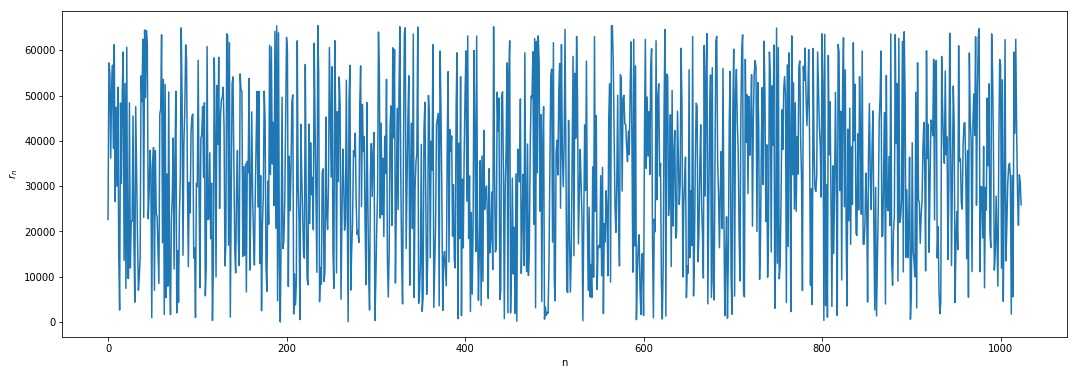

In [13]:
plt.figure(figsize=(18, 6))
plt.plot(rnd1[:1024],'-')
plt.xlabel('n')
plt.ylabel('$r_n$')

#### Test correlation

Text(0.5,1,'Simple LCG')

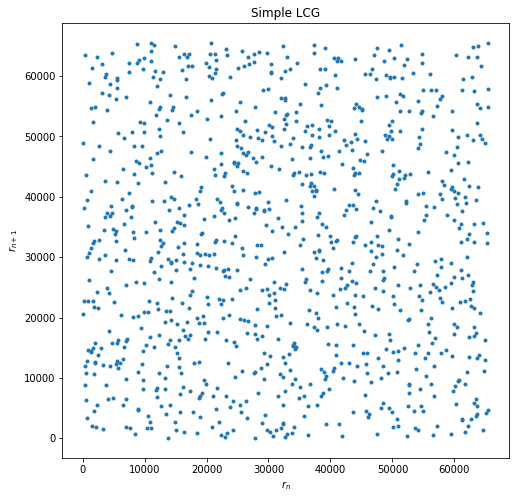

In [47]:
plt.figure(figsize=(8, 8))
#
k = 1
if k==1 : # only the first few points for visibility
    plt.plot(rnd1[0:1024],rnd1[1:1025],'.')
else:
    plt.plot(rnd1[0::k],rnd1[1::k],'.')
plt.xlabel('$r_n$')
plt.ylabel('$r_{n+%d}$' % k)
plt.title('Simple LCG')

### Python's built in RNG
- use tha same maximum range of $2^{16}$ as for our LCG

In [37]:
rnd2 = np.random.randint(low=0,high=2**16, size=2**16)

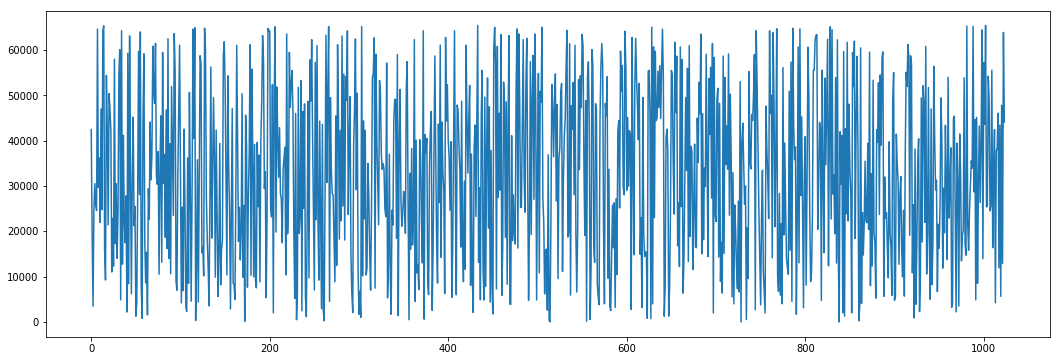

In [38]:
plt.figure(figsize=(18, 6))
plt.plot(rnd2[:1024],'-')

#### Test correlation

Text(0.5,1,'Built in RNG')

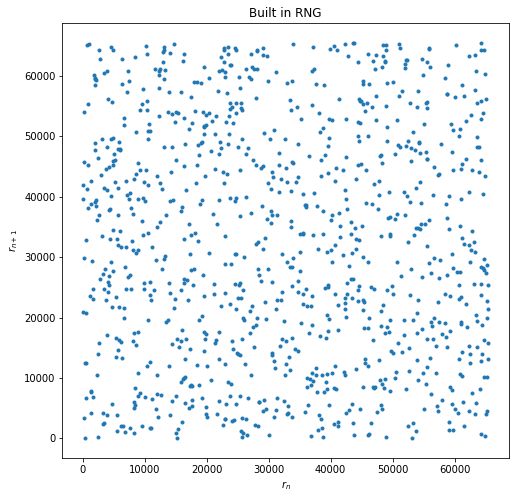

In [45]:
plt.figure(figsize=(8, 8))
#
k = 1
if k==1 : # only the first few points for visibility
    plt.plot(rnd2[0:1024],rnd2[1:1025],'.')
else:
    plt.plot(rnd2[0::k],rnd2[1::k],'.')
plt.xlabel('$r_n$')
plt.ylabel('$r_{n+%d}$' % k)
plt.title('Built in RNG')

### CSPRNG - cryptographically safe 

In [51]:
import random
_sysrand = random.SystemRandom()
rnd3 = [_sysrand.randint(0, 2**16) for i in range(2**16)]

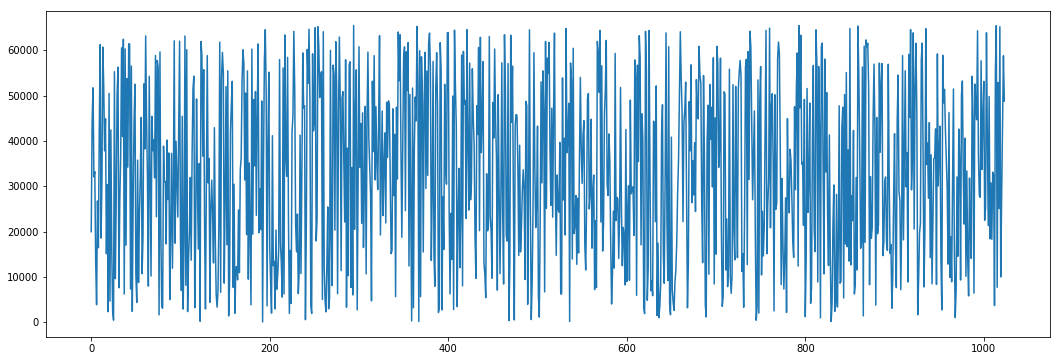

In [52]:
plt.figure(figsize=(18, 6))
plt.plot(rnd3[:1024],'-')

#### Test correlation

Text(0.5,1,'CSPRNG - cryptographically safe RNG')

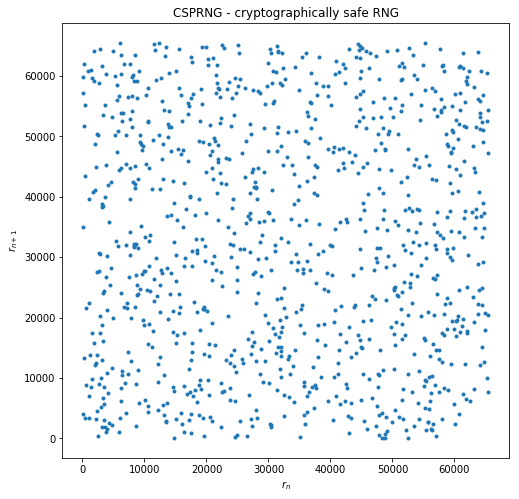

In [55]:
plt.figure(figsize=(8, 8))
k = 1
if k==1 : # only the first few points for visibility
    plt.plot(rnd3[0:1024],rnd3[1:1025],'.')
else:
    plt.plot(rnd3[0::k],rnd3[1::k],'.')
plt.xlabel('$r_n$')
plt.ylabel('$r_{n+%d}$' % k)
plt.title('CSPRNG - cryptographically safe RNG')

### Speed test

In [62]:
import timeit


# Initialize variables
x_value = 123456789    # Our seed, or X_0 = 123456789
a = 101427               # Our "a" base value
c = 321                  # Our "c" base value
m = (2 ** 16)            # Our "m" base value

def lcg1() -> None:
    return (a * x_value + c) % m

def prng() -> None:
    random.randint(0, 95)

def csprng() -> None:
    _sysrand.randint(0, 95)

setup = 'import random; from __main__ import lcg1, prng, csprng'
print('Best of 3 trials with 1,000,000 loops per trial:')

for f in ('lcg1()','prng()', 'csprng()'):
    best = min(timeit.repeat(f, setup=setup))
    print('\t{:8s} {:0.2f} seconds total time.'.format(f, best))

Best of 3 trials with 1,000,000 loops per trial:
	lcg1()   0.32 seconds total time.
	prng()   1.68 seconds total time.
	csprng() 5.10 seconds total time.


---
# END
---

### Think of this: Test - with surprising result - or is this OK?
- https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test
- from https://tonypoer.io/2016/03/23/experimenting-with-linear-congruential-generators-in-python/
- for better python random, and why not ude rand.random() for crypto see: https://realpython.com/python-random/

In [13]:
def runs_test_for_independence( data_points):
    """
    Perform a runs test for independence for a set of random numbers
    :param data_set: A data set with 10,000 samples - should be a list, with all numbers floats
    :param num_samples: The number of samples to test
    :return: z-test statistic for our data set
    """
    # Note, every sequence begins and ends with "NO EVENT"
    # Run = Succession of similar events, followed by a different event
    # Run Length = Number of events that occur in the run
    # Number of runs = number of "runs" total
    # Two concerns: Num runs, length of runs
    # We're looking for:  Runs of larger and smaller numbers (increasing or decreasing)
    runLengths = { }       # The size of each run, in order
    numRuns = 0            # The number of runs overall
    runDirection = "none"  # We'll use "none", "up", and "down" to keep track

    num_samples = len(data_points)
    
   # for value in data_points:
    for value in range(0, num_samples-1):

        # DEBUG
        thisValue = float(data_points[value])
        nextValue = float(data_points[value+1])
        # print "data_points[value] ::"+ str(thisValue)
        # print "dat_points[value+1] ::"+ str(nextValue)

        # If no change in direction we'll ignore
        if thisValue == nextValue:
            numRuns = numRuns             # numRums overall, doesn't change
            runDirection = runDirection   # runDirection doesn't change

        # Check if we have a NEW run, going UP
        elif thisValue < nextValue and runDirection != "up":
            numRuns = numRuns + 1         # We have a NEW run
            runDirection = "up"           # We have a NEW run direction
            runLengths[numRuns] = 1       # We have a NEW key in our dictionary, with value=1

        # Check if we have a CONTINUING run, going UP
        elif thisValue < nextValue and runDirection == "up":
            runLengths[numRuns] += 1      # increment the run length in our dictionary for current run
                                          # NumRuns doesn't change
                                          # runDirection doesn't change

        # Check if we have NEW run, going DOWN
        elif thisValue > nextValue and runDirection != "down":
            numRuns = numRuns + 1          # We have a NEW run
            runDirection = "down"          # We have a NEW run direction
            runLengths[numRuns] = 1        # We have a NEW key in our dictionary, with value=1

        # Check if we have a CONTINUING run, going DOWN
        elif thisValue > nextValue and runDirection == "down":
            runLengths[numRuns] += 1      # increment the run length in our dictionary for current run
                                          # NumRuns doesn't change
                                          # runDirection doesn't change

    # Leaving this loop, we should have a dictionary with our run numbers mapped to their lengths
    # We should also have a the number of runs

    # Now, calculate mean:  Mean = (2N-1)/3
    mean =  ( (2*num_samples - 1) / 3 )

    # And variance:  Variance = (16(N) - 29) / 90
    variance = ( ( 16*num_samples - 29) / 90 )

    # And we can use the mean & variance to calculate the Z-Test statistic
    z_statistic = ( (numRuns - mean) / np.sqrt(variance) )

    #print("Number of runs: " + str(numRuns))

    return [z_statistic,numRuns,mean]

In [14]:
def z_score_lookup( z_score, significance_level, two_sided=True):
    """
    Performs a two-sided z-score lookup, for 0.8, 0.9, or 0.95 level of significance
    :param z_score: Z score to test
    :param significance_level: Significance level
    :return: String detailing our result
    """

    result = "FAIL TO REJECT null hypothesis"
    critical_value = 0.0
    confidence_80 = 1.282
    confidence_90 = 1.645
    confidence_95 = 1.96
    confidence_99 = 2.576

    # Assign confidence interval z-scores to our crit value
    if significance_level == 0.8:
        critical_value = confidence_80
    elif significance_level == 0.9:
        critical_value = confidence_90
    elif significance_level == 0.95:
        critical_value = confidence_95
    else:
        print("Invalid significance level for z-lookup. Must be: 0.8, 0.9, or 0.95")

    # Need to adjust intervals if the test is one sided
    if two_sided == False:
        if critical_value == confidence_80:
            critical_value = 0.8416
        elif critical_value == confidence_90:
            critical_value = 1.282
        elif critical_value == confidence_95:
            critical_value = 1.645
    neg_crit_value = critical_value * (-1.0)

    #if z_score < 0:
     #  z_score = z_score * (-1)

    if ( two_sided and ( z_score <= neg_crit_value) or (critical_value <= z_score ) ):
        result = "REJECT null hypothesis"

    if ( not two_sided and z_score >= critical_value or z_score <= neg_crit_value):
        result = "REJECT null hypothesis"

    print ("Z score is: " + str(z_score))
    print ("Significance level is: " + str(significance_level))
    print ("Critical value is: " +str(critical_value))
    print ("Running two sided z-score lookup? -->" + str(two_sided))
    print ("")
    print ("Result is: " + result)
    print (".....................................")

    #return result

### Run the runs test

In [19]:
z_statistic1,numRuns1,mean1 = runs_test_for_independence(rnd1)
print(z_statistic1,numRuns1,mean1)

0.043234862752909484 43695 43690.333333333336


In [20]:
z_statistic2,numRuns2,mean2 = runs_test_for_independence(rnd2)
print(z_statistic2,numRuns2,mean2)

2.137037501787757 43921 43690.333333333336


In [77]:
z_statistic3,numRuns3,mean3 = runs_test_for_independence(rnd3)
print(z_statistic3,numRuns3,mean3)

-0.8276388012704341 43601 43690.333333333336


In [78]:
z_score_lookup(z_statistic3,0.8)

Z score is: -0.8276388012704341
Significance level is: 0.8
Critical value is: 1.282
Running two sided z-score lookup? -->True

Result is: FAIL TO REJECT null hypothesis
.....................................


In [22]:
z_score_lookup(z_statistic2,0.90)

Z score is: 2.137037501787757
Significance level is: 0.9
Critical value is: 1.645
Running two sided z-score lookup? -->True

Result is: REJECT null hypothesis
.....................................


#### Run several times with different seeds

In [65]:
meanLCG = []
meanRND = []
meanCSPRNG = []
theorMean = 0
n_samples = 2**16
sigma = np.sqrt( ( 16*n_samples - 29) / 90 )
n_runs = 100
for i in range(n_runs):
    rndX1 = generate_lcg(n_samples, seed=12345678+10*i)
    z_statistic1,numRuns1,mean1 = runs_test_for_independence(rndX1)
    meanLCG.append(numRuns1)
    theorMean = mean1
    
    rndX2 = np.random.randint(low=0,high=2**16, size=n_samples)
    z_statistic2,numRuns2,mean2 = runs_test_for_independence(rndX2)
    meanRND.append(numRuns2)
    
    rndX3 =  [_sysrand.randint(0, 2**16) for i in range(n_samples)]
    z_statistic3,numRuns3,mean3 = runs_test_for_independence(rndX3)
    meanCSPRNG.append(numRuns3)

In [66]:
print(np.mean(meanLCG)-theorMean,np.mean(meanRND)-theorMean,np.mean(meanCSPRNG)-theorMean)

7.406666666662204 -5.39333333333343 8.196666666663077


#### It looks like for short sequences built in RNG is not good, but for longer sequences it getting better. The average of average is not that bad, maybe there is no problem with the built in one? LCG may show some systematic bias.

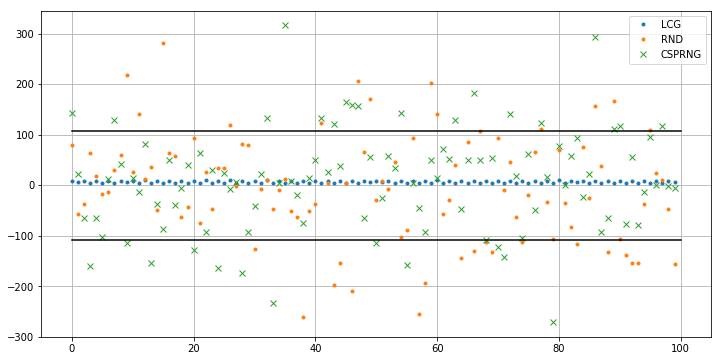

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(np.array(meanLCG)-theorMean,'.',label='LCG')
plt.plot(np.array(meanRND)-theorMean,'.',label='RND')
plt.plot(np.array(meanCSPRNG)-theorMean,'x',label='CSPRNG')
plt.plot([0,n_runs],[sigma,sigma],'-',c='black')
plt.plot([0,n_runs],[-sigma,-sigma],'-',c='black')
plt.grid()
plt.legend()